In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs


In [49]:
%run naturalGas_Wrangling.ipynb

## Demand

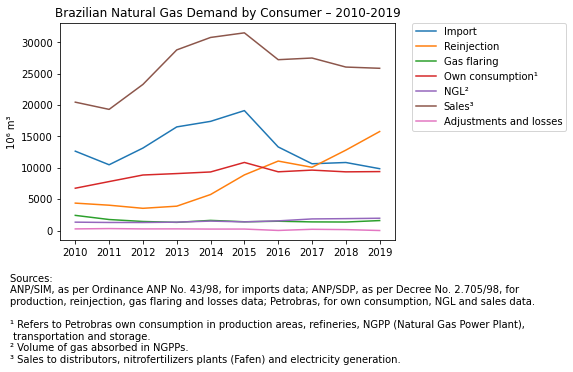

In [53]:
demand.df.plot()
plt.xticks(np.arange(2010,2020,1))
plt.ylabel(demand.unit)
plt.title(demand.title)
plt.figtext(0.01,-0.3, balance.footer)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

## Balance

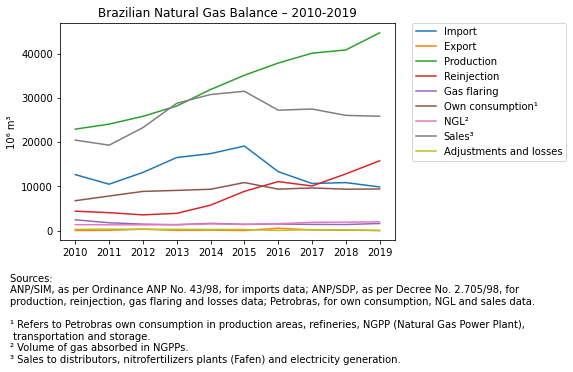

In [50]:

balance.df.plot()
plt.figtext(0.01,-0.3, balance.footer)
plt.ylabel(balance.unit)
plt.xticks(np.arange(2010,2020,1))
plt.title(balance.title)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);



## Balance Correlation

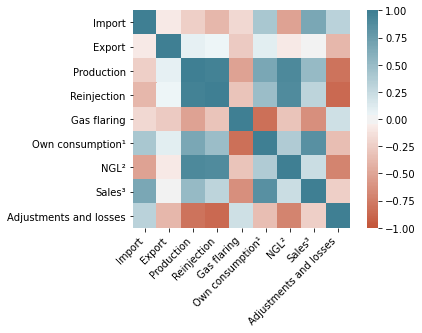

In [20]:
corr = balance.df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Electric Energy by Source

In [59]:
energy_source.df

Year                                    2000                              \
Month                                     1             2             3    
Energy Type                                                                
Biomassas                           0.000000      0.000000      0.000000   
Carvao                            772.954908    726.482505    685.798458   
Energia produzida fora do SIN            NaN           NaN  20670.975000   
Eolicas                             0.000000      0.000000      0.000000   
Gas Natural                       512.536500    580.842549    513.065176   
Hidreletricas exclusive Itaipu  21074.749841  20519.823366  21184.922627   
Itaipu                           6523.780292   6362.831799   7593.289824   
Nuclear                           418.609402    400.617872    400.187101   
Oleo Diesel / Combustivel         112.026593     69.214905     78.197350   
Residuos Processos Industriais      0.000000      0.000000      0.000000   
Solar Fotovoltaica                       NaN           NaN           NaN   

Year                                                                 \
Month                                  4           5             6    
Energy Type                                                           
Biomassas                        358.8856      0.0000      0.000000   
Carvao                             0.0000    725.8747    725.001500   
Energia produzida fora do SIN      0.0000         NaN           NaN   
Eolicas                            0.0000      0.0000      0.000000   
Gas Natural                      675.6017    503.2255    574.331600   
Hidreletricas exclusive Itaipu  7128.3002  21986.3235  20503.398688   
Itaipu                            39.2871   6814.9694   6928.030200   
Nuclear                            0.0000      0.0000      0.011100   
Oleo Diesel / Combustivel        337.4032    101.4555    105.998400   
Residuos Processos Industriais     0.0000      0.0000      0.000000   
Solar Fotovoltaica                    NaN         NaN           NaN   

Year                                                                  \
Month                                    7           8            9    
Energy Type                                                            
Biomassas                           0.00000      0.0000      0.00000   
Carvao                            607.47140    627.4963    397.34310   
Energia produzida fora do SIN           NaN         NaN          NaN   
Eolicas                             0.00000      0.0000      0.00000   
Gas Natural                       540.09250    547.1182    500.28480   
Hidreletricas exclusive Itaipu  20243.01143  20366.1559  19379.09209   
Itaipu                           7423.09770   7431.3229   8093.23684   
Nuclear                            67.88070    672.3908    781.17160   
Oleo Diesel / Combustivel         130.20700    127.6278     80.34823   
Residuos Processos Industriais      0.00000      0.0000      0.00000   
Solar Fotovoltaica                      NaN         NaN          NaN   

Year                                          ...          2018                \
Month                                     10  ...            9             10   
Energy Type                                   ...                               
Biomassas                           0.000000  ...    906.250506    803.887412   
Carvao                            337.300572  ...   1202.453353   1072.563044   
Energia produzida fora do SIN            NaN  ...    244.488764    332.856552   
Eolicas                             0.000000  ...   5138.397764   4306.121173   
Gas Natural                       551.155034  ...   5240.852556   4194.910667   
Hidreletricas exclusive Itaipu  22529.277220  ...  22377.000000  25249.350506   
Itaipu                           7495.719297  ...   5219.000000   7234.961361   
Nuclear                           537.460912  ...   1448.836759   1361.985466   
Oleo Diesel / Combustivel          70.41

## ARIMA MODEL

Auto Regressive Integrated Moving Average Model is characterized by 3 terms:

> * `p`: is the order of the AR (Auto Regressive) term
> * `d`: is the number of differencing (Integrated) required to make the time series stationary
> * `q`: is the order of the MA (Moving Average) term


1 - `Why` make the time series `stationary`?

>The `Auto Regressive` term in ARIMA means that the linear regression model uses its own lags as predictors, and in order to do so, the time series need to be stationary.

2 - `How` to make it `stationary`?

>Differentiating it. Sometimes more than one differencing may be needed.

3 - What is the meaning of `order of AR term`?

>It is the number of lags of Y to be used as predictors.

4 - What is the meaning of `order of MA term`?

>It is the number of lagged forecast erros taht should go into the ARIMA Model.

5 - What is `Moving Average`?

>Is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

### Auto Regressive Model

Is where $Y_{t}$ depends only on its own lags.

> $Y_{t} = \alpha + \beta_{1}Y_{t-1} + \beta_{2}Y_{t-2} + ... + \beta_{p}Y_{t-p} + \epsilon_{1} $

>* $Y_{t}$: is the $lag_{1}$ of the series.
>* $\beta_{1}$: is the coefficient of $lag_{1}$ that the model estimates
>* $\alpha$: is the intercept term, also estimated by the model.

### Moving Average Model

Is where $Y_{t}$ depends only on the lagged forecast errors.

> $Y_{t} = \alpha + \epsilon_{t} + \phi_{1} \epsilon_{t-1} + \phi_{2} \epsilon_{t-2}$ + ...  $+ \phi_{q} \epsilon_{t-q}$
>* $\epsilon_{t}$: is the errors from $Y_{t}$
>* $\epsilon_{t-1}$: is the errors from $Y_{t-1}$

### ARIMA MODEL EQUATION

Is where the time series was differenced at least one time to make it stationary and you combine the AR term and the MA term. So the equation becomes:

>$Y_{t} = \alpha + \beta_{1}Y_{t-1} + \beta_{2}Y_{t-2} + ... + \beta_{p}Y_{t-p}\epsilon_{t}$
$ + \phi_{1} \epsilon_{t-1} + \phi_{2} \epsilon_{t-2} + ... + \phi_{q} \epsilon_{t-q}$





In [8]:
# Finding d

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(demand_total)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.042111
p-value: 0.737597


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(demand_total); axes[0, 0].set_title('Original Series')
plot_acf(demand_total, ax=axes[0, 1])
plt.xticks(demand_total.index)

# 1st Differencing
axes[1, 0].plot(demand_total.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(demand_total.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(demand_total.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(demand_total.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method